In [51]:
import numpy as np
import pandas as pd
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
df=pd.read_csv(r"C:\Users\heman\OneDrive\Desktop\AFTER BTECH\innomatics\internship\task1ml\Hemanth's_Daily_Task-7_on_Lambda_Map_While_Loop_Questions\reviews_badminton\data.csv")

In [12]:
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [13]:
(df.isna().sum()/len(df))*100

Reviewer Name      0.117398
Review Title       0.117398
Place of Review    0.586992
Up Votes           0.117398
Down Votes         0.117398
Month              5.459028
Review text        0.093919
Ratings            0.000000
dtype: float64

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [16]:
# Univariate Analysis

In [17]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8013.000000,8013.000000,8013.000000
mean,0.386747,0.123424,4.198178
std,11.849649,3.334320,1.244423
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


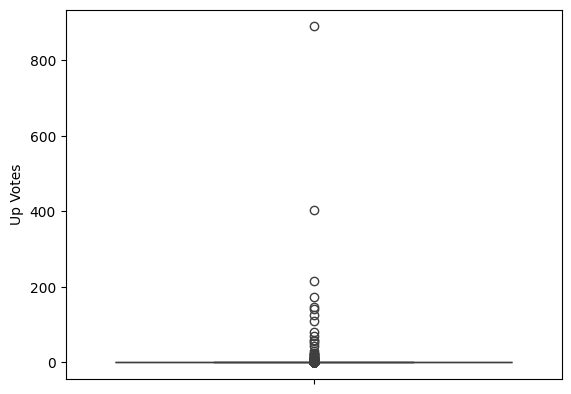

Up Votes
0.0      7817
1.0       112
2.0        23
3.0        15
4.0        10
14.0        3
5.0         3
6.0         2
8.0         2
22.0        2
109.0       1
889.0       1
146.0       1
42.0        1
59.0        1
50.0        1
403.0       1
173.0       1
30.0        1
12.0        1
81.0        1
71.0        1
142.0       1
23.0        1
57.0        1
11.0        1
216.0       1
9.0         1
13.0        1
19.0        1
17.0        1
124.0       1
24.0        1
7.0         1
Name: count, dtype: int64


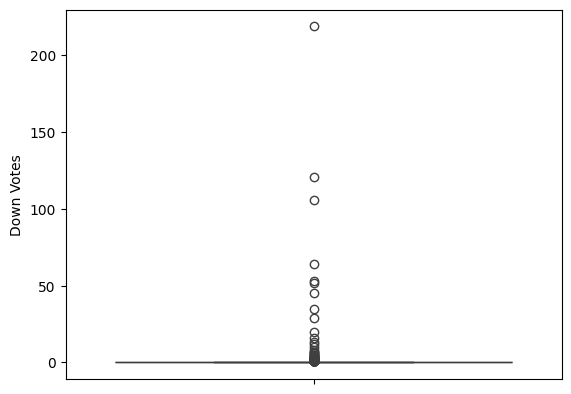

Down Votes
0.0      7891
1.0        73
2.0        13
3.0        11
5.0         4
4.0         2
6.0         2
7.0         2
121.0       1
45.0        1
64.0        1
13.0        1
53.0        1
12.0        1
16.0        1
35.0        1
29.0        1
52.0        1
10.0        1
219.0       1
8.0         1
106.0       1
20.0        1
Name: count, dtype: int64


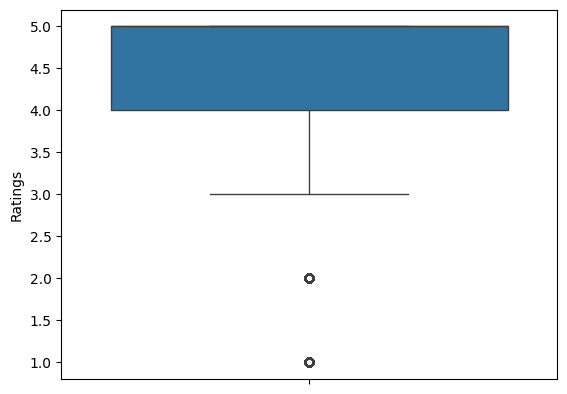

Ratings
5    4803
4    1659
1     688
3     575
2     288
Name: count, dtype: int64


In [18]:
for i in df.select_dtypes(exclude="object"):
    sns.boxplot(df[i])
    plt.show()
    print(df[i].value_counts())

In [19]:
df['Review text']=df['Review text'].apply(lambda x: re.sub("READ MORE","",x) if "READ MORE" in x else x)

In [20]:
df['review_length'] = df['Review text'].str.len()

In [21]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,review_length
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,195
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,109
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,148
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,5,40
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,102
...,...,...,...,...,...,...,...,...,...
8495,vishal kumar ashish,Nice,"Certified Buyer, Haridwar",0.0,0.0,Oct 2016,Thanks to the delivery boy ... Service is alwa...,5,59
8496,Nitya Nand Rai,Good choice,"Certified Buyer, Raebareli",0.0,0.0,Oct 2016,Over priced even after 50% discount price is m...,1,128
8497,Tarun Reddy,Awesome,Certified Buyer,0.0,0.0,Oct 2016,Too much priced. It was getting me for Rs. 640...,1,177
8499,Jayachandra,High cost,"Certified Buyer, Mangalore",0.0,0.0,Dec 2015,Hii flipkart customers care..why your delivery...,5,140


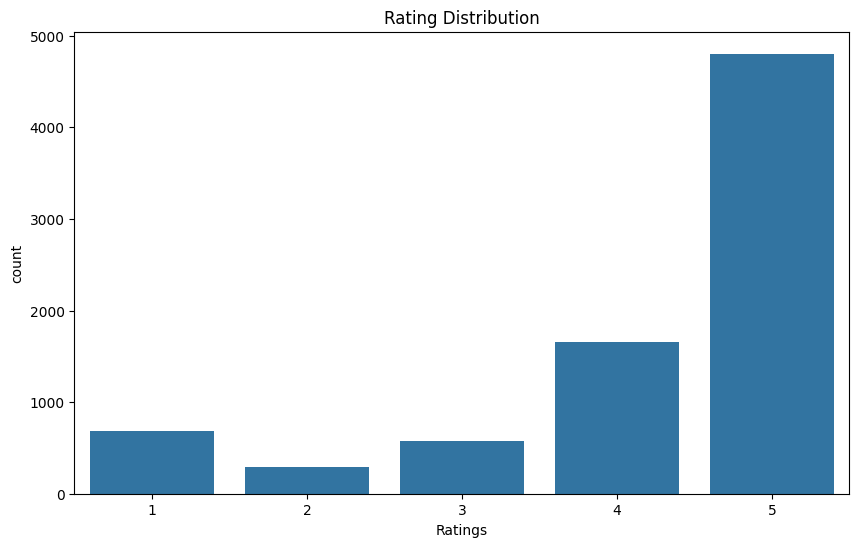

Text(0.5, 1.0, 'Review Length by Rating')

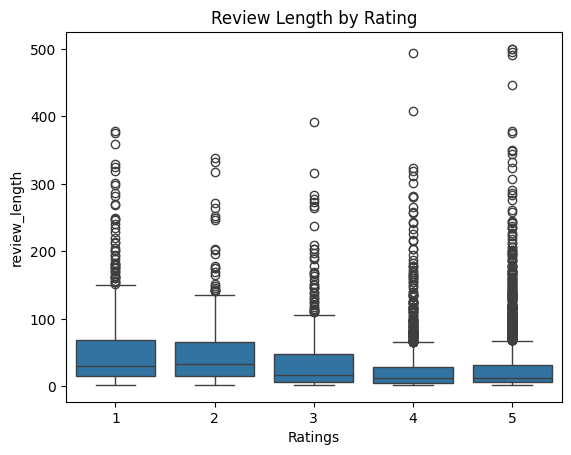

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Ratings')
plt.title('Rating Distribution')
plt.show()

# 1-star vs 5-star review lengths
sns.boxplot(data=df, x='Ratings', y='review_length')
plt.title('Review Length by Rating')


<Axes: xlabel='helpfulness', ylabel='Count'>

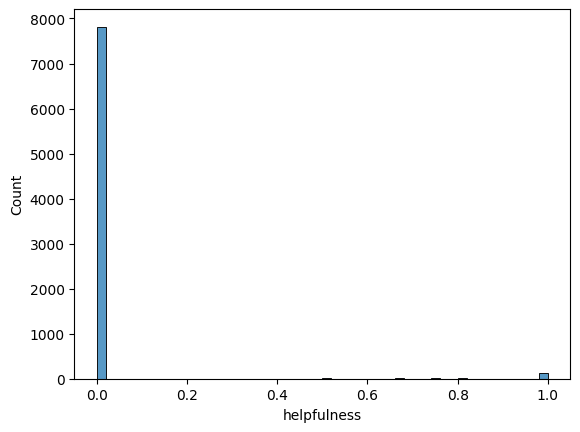

In [23]:
df['helpfulness'] = df['Up Votes'] / (df['Up Votes'] + df['Down Votes']).replace(0,1)
sns.histplot(df['helpfulness'], bins=50)


In [24]:
df['month'] = pd.to_datetime(df['Month'], format='%b %Y')

array([<Axes: xlabel='month'>, <Axes: xlabel='month'>], dtype=object)

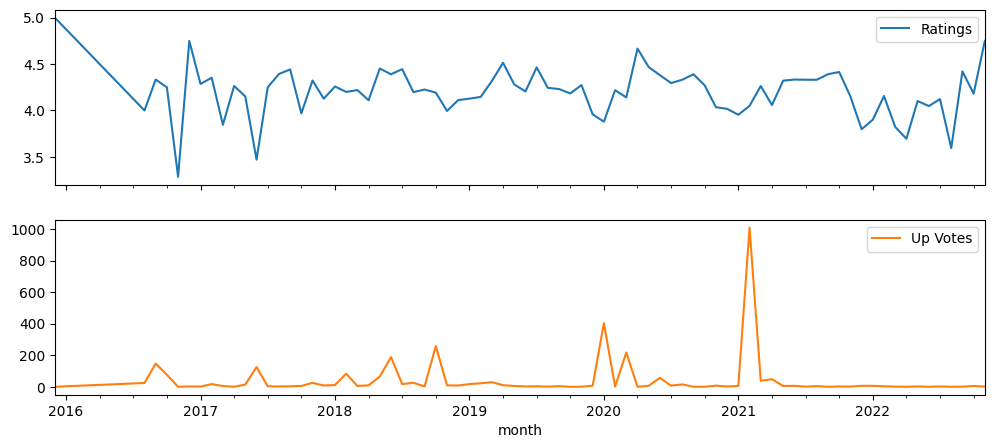

In [26]:
df.groupby(df['month'].dt.to_period('M')).agg({
    'Ratings': 'mean',
    'Up Votes': 'sum'
}).plot(subplots=True, figsize=(12,5))


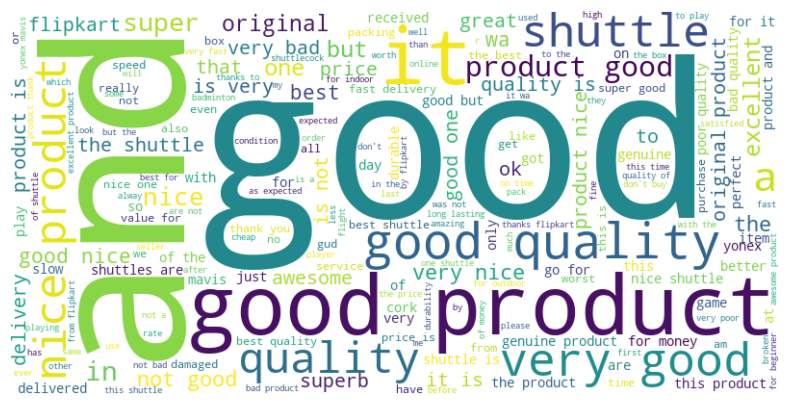

In [33]:
# Join all reviews
all_text = " ".join(df['Review text'].str.lower())

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords="english"
)

wc.generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [34]:
df['Ratings']=df['Ratings'].apply(lambda x: "Positive" if x>3 else "Negative")

In [35]:
df["Titleplustext"]=df['Review text']+" "+df['Review Title']

In [36]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,review_length,helpfulness,month,Titleplustext
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",Positive,195,0.932844,2021-02-01,"Nice product, good quality, but price is now r..."
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,Negative,109,0.947826,2021-02-01,They didn't supplied Yonex Mavis 350. Outside ...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,Negative,148,0.933333,2021-04-01,Worst product. Damaged shuttlecocks packed in ...
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,Positive,40,0.793578,2018-10-01,Good quality product. Delivered on time. Mind-...
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,Positive,102,0.769084,2020-01-01,BEST PURCHASE It is a good quality and is more...
...,...,...,...,...,...,...,...,...,...,...,...,...
8495,vishal kumar ashish,Nice,"Certified Buyer, Haridwar",0.0,0.0,Oct 2016,Thanks to the delivery boy ... Service is alwa...,Positive,59,0.000000,2016-10-01,Thanks to the delivery boy ... Service is alwa...
8496,Nitya Nand Rai,Good choice,"Certified Buyer, Raebareli",0.0,0.0,Oct 2016,Over priced even after 50% discount price is m...,Negative,128,0.000000,2016-10-01,Over priced even after 50% discount price is m...
8497,Tarun Reddy,Awesome,Certified Buyer,0.0,0.0,Oct 2016,Too much priced. It was getting me for Rs. 640...,Negative,177,0.000000,2016-10-01,Too much priced. It was getting me for Rs. 640...
8499,Jayachandra,High cost,"Certified Buyer, Mangalore",0.0,0.0,Dec 2015,Hii flipkart customers care..why your delivery...,Positive,140,0.000000,2015-12-01,Hii flipkart customers care..why your delivery...


In [37]:
X=df['Titleplustext']
y=df['Ratings']

In [38]:
X=X.apply(lambda x:re.sub('[^A-Za-z\s]',"",x))
X=X.str.lower()
Stopwords=stopwords.words('english')
X=X.apply(lambda x:" ".join([i for i in nltk.word_tokenize(x) if i not in Stopwords]))
lemmatizer=WordNetLemmatizer()
X=X.apply(lambda x:" ".join([lemmatizer.lemmatize(i) for i in nltk.word_tokenize(x)]))

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [70]:
from sklearn.naive_bayes import BernoulliNB

pipe_nb = Pipeline([
    ("tfidf", TfidfVectorizer(binary=True)),
    ("model", BernoulliNB())
])

pipe_nb.fit(X_train, y_train)
y_pred_nb = pipe_nb.predict(X_test)

f1_nb = f1_score(y_test, y_pred_nb, pos_label="Negative")
print("BernoulliNB F1:", f1_nb)


BernoulliNB F1: 0.45021645021645024


In [71]:
from sklearn.naive_bayes import MultinomialNB

pipe_mnb = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("model", MultinomialNB())
])

pipe_mnb.fit(X_train, y_train)
y_pred_mnb = pipe_mnb.predict(X_test)

f1_mnb = f1_score(y_test, y_pred_mnb, pos_label="Negative")
print("MultinomialNB F1:", f1_mnb)


MultinomialNB F1: 0.2857142857142857


In [72]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("model", LogisticRegression(max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

f1_lr = f1_score(y_test, y_pred_lr, pos_label="Negative")
print("Logistic Regression F1:", f1_lr)


Logistic Regression F1: 0.5098901098901099


In [73]:
from sklearn.svm import LinearSVC

pipe_svm = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=8000)),
    ("model", LinearSVC())
])

pipe_svm.fit(X_train, y_train)
y_pred_svm = pipe_svm.predict(X_test)

f1_svm = f1_score(y_test, y_pred_svm, pos_label="Negative")
print("Linear SVM F1:", f1_svm)


Linear SVM F1: 0.5577689243027888


In [76]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=3000)),
    ("model", RandomForestClassifier(n_estimators=200))
])

pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

f1_rf = f1_score(y_test, y_pred_rf, pos_label="Negative")
print("Random Forest F1:", f1_rf)


Random Forest F1: 0.5


In [77]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=3000)),
    ("model", GradientBoostingClassifier())
])

pipe_gb.fit(X_train, y_train)
y_pred_gb = pipe_gb.predict(X_test)

f1_gb = f1_score(y_test, y_pred_gb, pos_label="Negative")
print("Gradient Boosting F1:", f1_gb)


Gradient Boosting F1: 0.44075829383886256


In [78]:
import pickle
with open ("model.pkl","wb") as f:
    pickle.dump(pipe_gb,f)

In [79]:
pipe_gb.predict(["bad product"])

array(['Negative'], dtype=object)

In [80]:
results = {
    "BernoulliNB": f1_nb,
    "MultinomialNB": f1_mnb,
    "LogisticRegression": f1_lr,
    "LinearSVM": f1_svm,
    "RandomForest": f1_rf,
    "GradientBoosting": f1_gb
}

for model, score in results.items():
    print(f"{model}: {score:.4f}")


BernoulliNB: 0.4502
MultinomialNB: 0.2857
LogisticRegression: 0.5099
LinearSVM: 0.5578
RandomForest: 0.5000
GradientBoosting: 0.4408


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
X_train_trans=cv.fit_transform(X_train)
X_test_trans=cv.transform(X_test)

In [82]:
from sklearn.naive_bayes import GaussianNB
pipe = Pipeline(steps=[
    ("model", GaussianNB())
])

para={
    "model__var_smoothing":[
        1e-13,1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,
        1e-3, 1e-2, 1e-1, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4
    ]
}

grid=GridSearchCV(estimator=pipe, param_grid=para, cv=5, scoring="f1_weighted", n_jobs=-1)
# Convert sparse matrices to dense arrays for GaussianNB
grid.fit(X_train_trans.toarray(), y_train)

print(f"Best metrics : {grid.best_params_}")
print(f"cv accuracy : {grid.best_score_}")
print(f"Train : {f1_score(y_train, grid.predict(X_train_trans.toarray()), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid.predict(X_test_trans.toarray()), pos_label='Positive')}")

Best metrics : {'model__var_smoothing': 0.01}
cv accuracy : 0.8179446144764725
Train : 0.9275974649510275
Test : 0.881199538638985


In [ ]:
from sklearn.naive_bayes import BernoulliNB
pipe = Pipeline(steps=[
    ("model", BernoulliNB())
])

para={"model__alpha":[1e-8,1e-7,1e-6,1e-5,1e-4]
}
grid=GridSearchCV(estimator=pipe,param_grid=para,cv=5,scoring="f1_weighted",n_jobs=-1)
grid.fit(X_train,y_train)
print(f"Best metrics : {grid.best_params_}")
print(f"cv accuracy : {grid.best_score_}")
print(f"Train : {f1_score(y_train, grid.predict(X_train_trans), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid.predict(X_test_trans), pos_label='Positive')}")

In [83]:
from sklearn.naive_bayes import BernoulliNB
pipe = Pipeline(steps=[
    ("model", BernoulliNB())
])

para={"model__alpha":[1e-8,1e-7,1e-6,1e-5,1e-4]
}
grid=GridSearchCV(estimator=pipe,param_grid=para,cv=5,scoring="f1_weighted",n_jobs=-1)
grid.fit(X_train_trans,y_train)
print(f"Best metrics : {grid.best_params_}")
print(f"cv accuracy : {grid.best_score_}")
print(f"Train : {f1_score(y_train, grid.predict(X_train_trans), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid.predict(X_test_trans), pos_label='Positive')}")

Best metrics : {'model__alpha': 0.0001}
cv accuracy : 0.8406778733889662
Train : 0.9415182755388941
Test : 0.9041805401405846


In [84]:
from sklearn.naive_bayes import ComplementNB

pipe = Pipeline(steps=[
      # Add a scaler to handle negative values
    ("model", ComplementNB())
])

para={"model__alpha":[1e-5,1e-4,1e-3,1e-2,1.01,1.0,10,11,12,13,14,16]
}
grid=GridSearchCV(estimator=pipe,param_grid=para,cv=5,scoring="f1_weighted",n_jobs=-1)
grid.fit(X_train_trans,y_train)
print(f"Best metrics : {grid.best_params_}")
print(f"cv accuracy : {grid.best_score_}")
print(f"Train : {f1_score(y_train, grid.predict(X_train_trans), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid.predict(X_test_trans), pos_label='Positive')}")

Best metrics : {'model__alpha': 1.0}
cv accuracy : 0.833428922968484
Train : 0.9183852995797087
Test : 0.9049808429118774


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_dt = Pipeline([
    ("model", DecisionTreeClassifier(random_state=42))
])

param_dt = {
    "model__max_depth": [ 5, 10, 30,35,40,45],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 5],
    "model__criterion": ["gini", "entropy"]
}

grid_dt = GridSearchCV(
    pipe_dt,
    param_dt,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_dt.fit(X_train_trans, y_train)
print(f"Best metrics : {grid_dt.best_params_}")
print(f"cv accuracy : {grid_dt.best_score_}")
print(f"Train : {f1_score(y_train, grid_dt.predict(X_train_trans), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid_dt.predict(X_test_trans), pos_label='Positive')}")


Best metrics : {'model__criterion': 'gini', 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}
cv accuracy : 0.835783929101979
Train : 0.9521856650200391
Test : 0.9060081091043126


In [86]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_lsvm = Pipeline([("tfidf",TfidfVectorizer(ngram_range=(1,2),
    max_df=0.9,
    min_df=5,
    max_features=5000,
    stop_words="english",
    sublinear_tf=True)),
    ("model", LinearSVC())

])

param_lsvm = {
    "model__C": [0.01, 0.1, 1, 10]
}

grid_lsvm = GridSearchCV(
    pipe_lsvm,
    param_lsvm,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_lsvm.fit(X_train, y_train)
print(f"Best metrics : {grid_lsvm.best_params_}")
print(f"cv accuracy : {grid_lsvm.best_score_}")
print(f"Train : {f1_score(y_train, grid_lsvm.predict(X_train), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid_lsvm.predict(X_test), pos_label='Positive')}")

Best metrics : {'model__C': 1}
cv accuracy : 0.8648561692243433
Train : 0.944730197325353
Test : 0.9191770756796473


In [87]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("model", LogisticRegression(max_iter=100))
])

param_lr = {
    "model__penalty": ["l2"],
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__solver": ["lbfgs"]
}

grid_lr = GridSearchCV(
    pipe_lr,
    param_lr,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_lr.fit(X_train_trans, y_train)
print(f"Best metrics : {grid_lr.best_params_}")
print(f"cv accuracy : {grid_lr.best_score_}")
print(f"Train : {f1_score(y_train, grid_lr.predict(X_train_trans), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid_lr.predict(X_test_trans), pos_label='Positive')}")

Best metrics : {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
cv accuracy : 0.8544621833763181
Train : 0.9541215261422515
Test : 0.9149408284023669


In [88]:
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ("model", SVC())
])

param_svm = [
    {
        "model__kernel": ["linear"],
        "model__C": [0.1, 1, 10]
    },
    {
        "model__kernel": ["rbf"],
        "model__C": [0.1, 1, 10],
        "model__gamma": ["scale", 0.01, 0.1, 1]
    }
]

grid_svm = GridSearchCV(
    pipe_svm,
    param_svm,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_svm.fit(X_train_trans, y_train)
print(f"Best metrics : {grid_svm.best_params_}")
print(f"cv accuracy : {grid_svm.best_score_}")
print(f"Train : {f1_score(y_train, grid_svm.predict(X_train_trans), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid_svm.predict(X_test_trans), pos_label='Positive')}")

Best metrics : {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
cv accuracy : 0.8592785946891152
Train : 0.9541697971450037
Test : 0.9199557358908153


In [89]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ("model", RandomForestClassifier(random_state=42))
])

param_rf = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_rf,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_rf.fit(X_train_trans, y_train)
print(f"Best metrics : {grid_rf.best_params_}")
print(f"cv accuracy : {grid_rf.best_score_}")
print(f"Train : {f1_score(y_train, grid_rf.predict(X_train_trans), pos_label='Positive')}")
print(f"Test : {f1_score(y_test, grid_rf.predict(X_test_trans), pos_label='Positive')}")


Best metrics : {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
cv accuracy : 0.7651407968148083
Train : 0.9127860740478926
Test : 0.903068340306834


In [90]:
import pickle
with open ("model.pkl","wb") as f:
    pickle.dump(grid_lsvm,f)